<a href="https://colab.research.google.com/github/kezamamio/CpE-AIML/blob/main/58034_Lab03_TrashTakers%20/%2058034_Lab03_TrashTakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [12]:
### YOUR CODE HERE
class LinearRegression_Simple():
  
  ### Program the required methods

  ### Covariance
  @staticmethod
  def covariance(vectA, vectB):
    return np.cov(vectA,vectB)[0,1]

  ### Pearsons R
  @staticmethod
  def pearsons_r(vectA, vectB):
    cov_xy = np.cov(vectA,vectB, bias=True)[0,1]
    std_x = np.std(vectA)
    std_y = np.std(vectB)
    return cov_xy / (std_x*std_y)

  ### __init__ construction function to declare .model_ 
  def __init__(self):
    self.model_ = self.train(X,y)             ##to pass the train method to model_

  ### train (X,y)
  @staticmethod
  def train(X,y):
    std_X, std_y = np.std(X), np.std(y)
    rho = np.corrcoef(X,y)[0,1]
    w1 = rho*(std_y/std_X)
    w0 = y.mean()-w1*X.mean()
    return np.array([w1, w0]).reshape(2,1)

  ### predict(X)
  @staticmethod
  def predict(x):
    std_X, std_y = np.std(X), np.std(y)
    rho = np.corrcoef(X,y)[0,1]
    w1 = rho*(std_y/std_X)
    w0 = y.mean()-w1*X.mean()
    pred = w0 + w1*x
    return np.array(pred).reshape(x.size,1)
    
  ### evaluate()
  def evaluate(self):
    y_hat = self.predict(X).reshape(1,X.size)
    sst=np.sum(np.square(y-y.mean()))
    ssr=np.sum(np.square(y_hat-y.mean()))
    sse=np.sum(np.square(y_hat-y))
    mse=np.mean(np.square(y_hat-y))
    rmse=np.sqrt(mse)
    rss=1-sse/sst
    arss=1-(((1-rss)*(y.size-1))/(y.size-1-1))
    eval_dict ={'Sum of Squares Total':[sst],
               'Sum of Squares Regression':[ssr],
               'Sum of Squares Error':[sse],
               'Mean Squared Error':[mse],
               'Root Mean Squared Error':[rmse],
               'R-Squared':[rss],
               'Adjusted R-Squared':[arss]
               }
    return eval_dict

  ### visualize() 
  @staticmethod
  def visualize():
    std_X = np.std(X)
    std_y = np.std(y)
    rho = np.corrcoef(X,y)[0,1]
    w1 = rho*(std_y/std_X)
    w0 = y.mean()-w1*X.mean()
    model_= w0 + w1*X

    plt.figure(figsize=(5,5), dpi=400)
    plt.grid()
    plt.scatter(X,y)
    plt.plot(X, model_)
    plt.savefig("output.jpg")
    plt.show()
 
  ### You may add other helper functions in to make your code cleaner

In [13]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [14]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [15]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

-456.6633012116484

Expected output value:
$$cov_{x,y} = -456.66$$

In [16]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

-0.9050803915258333

Expected output value:
$$r = -0.90$$

In [17]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([[-0.54257026],
       [-9.3787971 ]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54 \\ -9.38\end{bmatrix}$$

In [18]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

array([[-63.63582299],
       [-64.17839325],
       [-64.72096351],
       [-65.26353377],
       [-65.80610403]])

Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [19]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-Squared': [0.8173253162992968],
 'Mean Squared Error': [54.14797548090916],
 'R-Squared': [0.8191705151245564],
 'Root Mean Squared Error': [7.358530796355286],
 'Sum of Squares Error': [5414.797548090916],
 'Sum of Squares Regression': [24529.42062971709],
 'Sum of Squares Total': [29944.21817780801]}

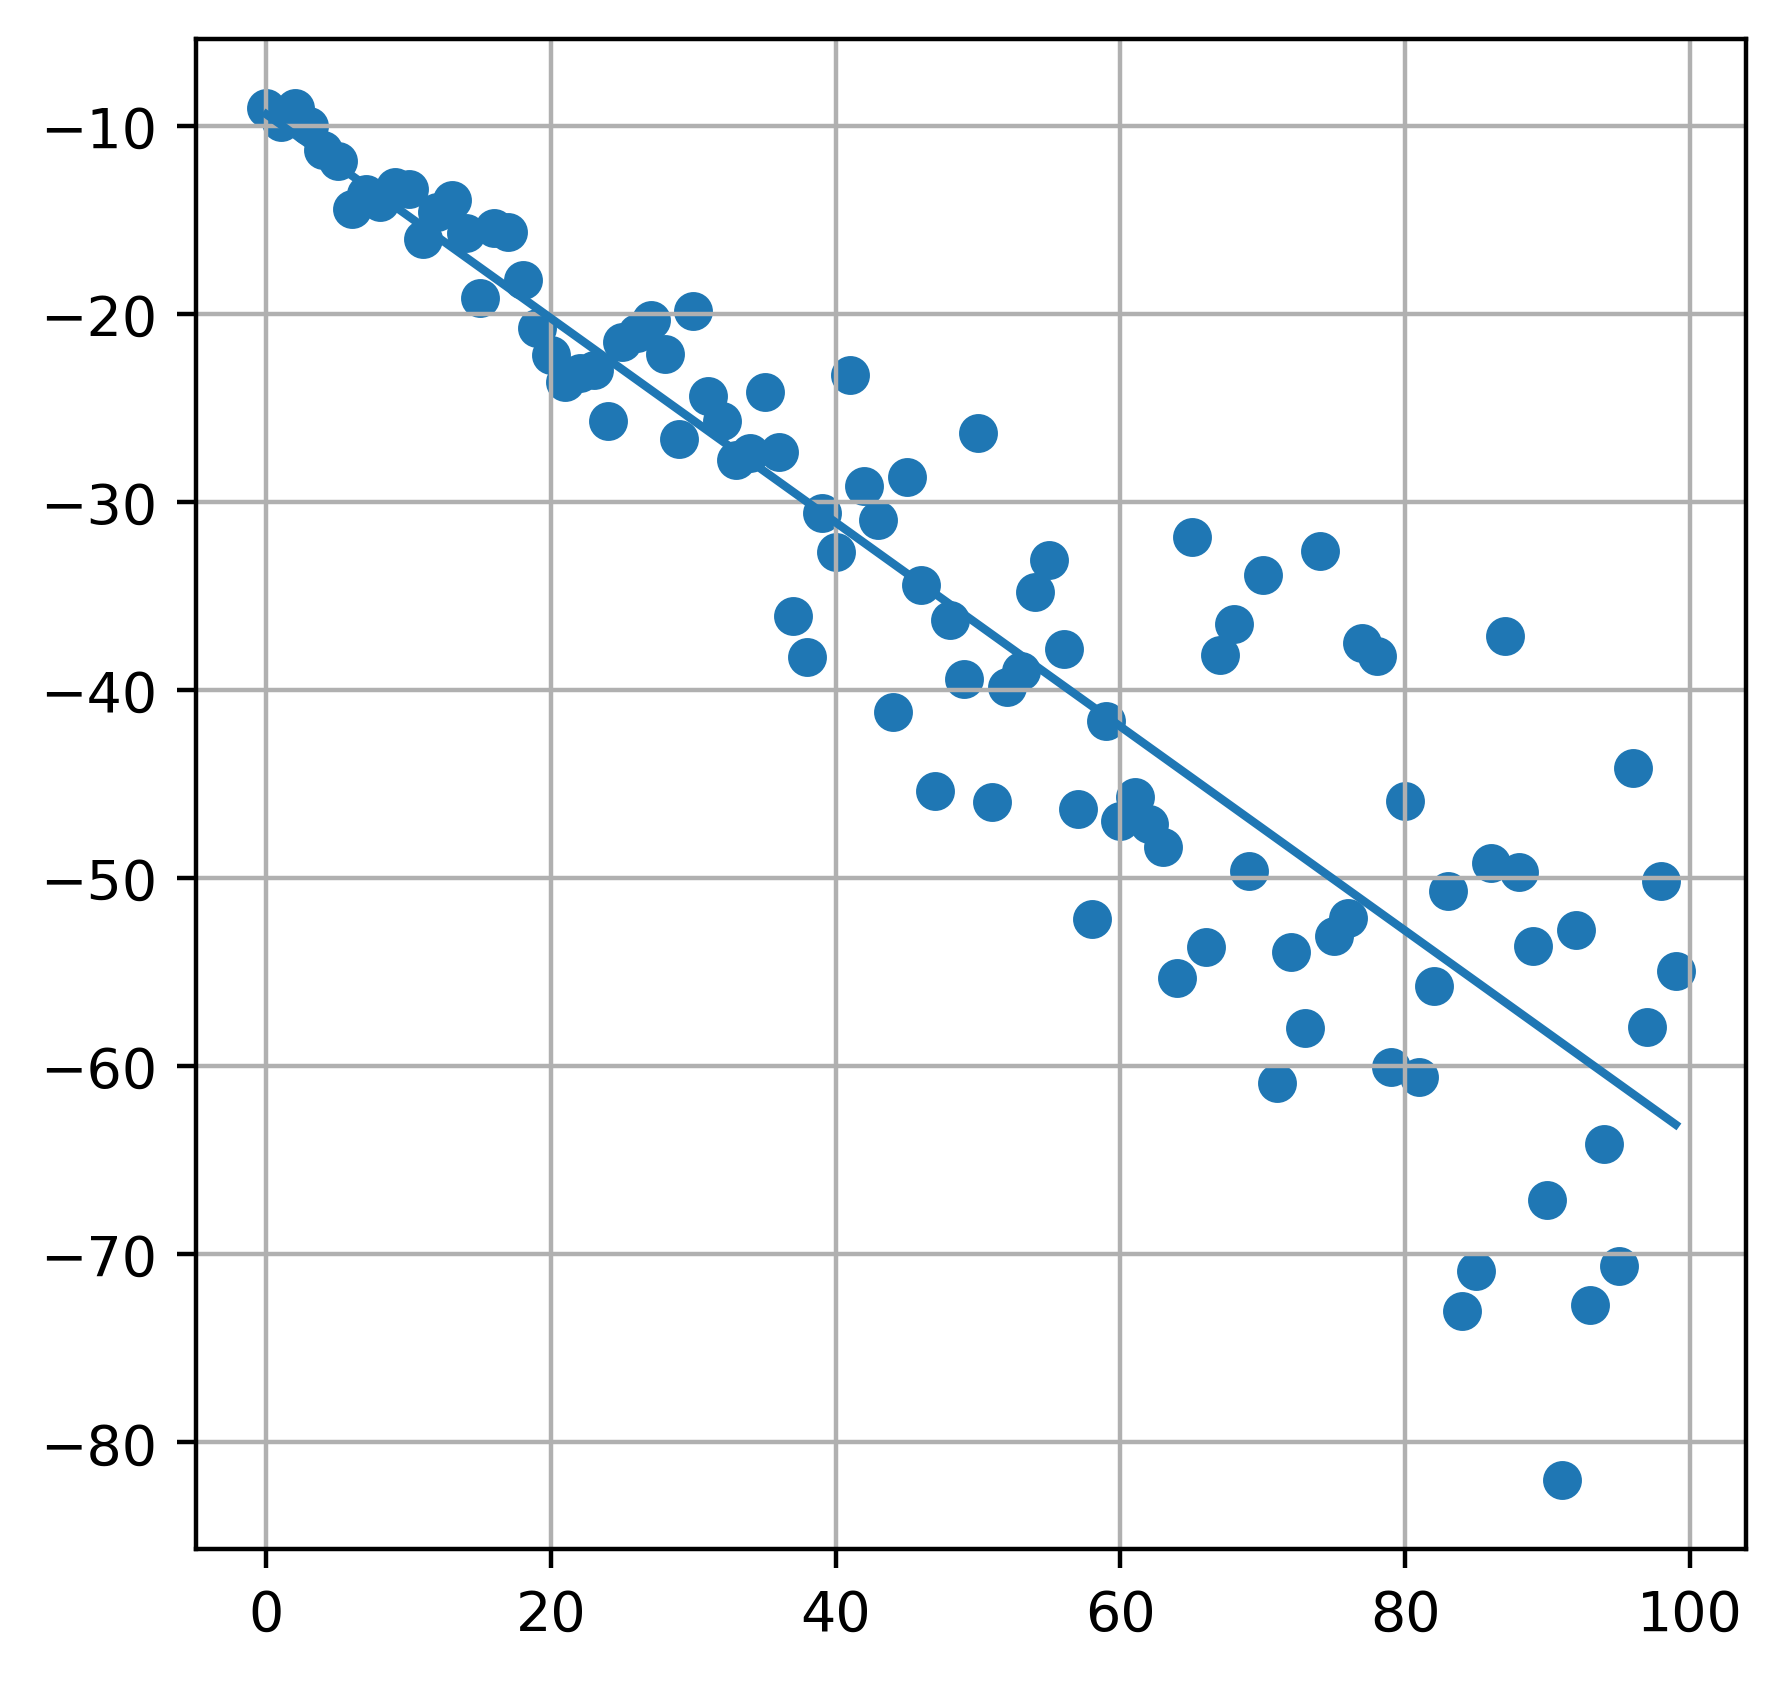

In [20]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()